<a href="https://colab.research.google.com/github/anekekarina99/NLPMultiTextClass/blob/main/NLPMulti_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df_read = pd.read_csv("/content/TheSocialDilemma.csv")

df_read.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,Sentiment
0,Mari Smith,"San Diego, California",Premier Facebook Marketing Expert | Social Med...,2007-09-11 22:22:51,579942,288625,11610,False,2020-09-16 20:55:33,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,NaN,Twitter Web App,False,Neutral
1,Mari Smith,"San Diego, California",Premier Facebook Marketing Expert | Social Med...,2007-09-11 22:22:51,579942,288625,11610,False,2020-09-16 20:53:17,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,NaN,Twitter Web App,False,Neutral
2,Varun Tyagi,"Goa, India",Indian | Tech Solution Artist & Hospitality Ex...,2009-09-06 10:36:01,257,204,475,False,2020-09-16 20:51:57,Go watch “The Social Dilemma” on Netflix!\n\nI...,NaN,Twitter for iPhone,False,Positive
3,Casey Conway,"Sydney, New South Wales",Head of Diversity & Inclusion @RugbyAU | It's ...,2012-12-28 21:45:06,11782,1033,12219,True,2020-09-16 20:51:46,I watched #TheSocialDilemma last night. I’m sc...,['TheSocialDilemma'],Twitter for iPhone,False,Negative
4,Charlotte Paul,Darlington,Instagram Charlottejyates,2012-05-28 20:43:08,278,387,5850,False,2020-09-16 20:51:11,The problem of me being on my phone most the t...,['TheSocialDilemma'],Twitter for iPhone,False,Positive


In [ ]:
df_read.describe()

,user_followers,user_friends,user_favourites
count,2.006800e+04,20068.000000,20068.000000
mean,8.805132e+03,1117.027656,13936.924606
std,1.540008e+05,5169.791715,30437.971876
min,0.000000e+00,0.000000,0.000000
25%,9.700000e+01,186.000000,789.000000
50%,3.660000e+02,441.000000,3866.500000
75%,1.289000e+03,1001.000000,13294.500000
max,1.562443e+07,288625.000000,708749.000000


In [ ]:
df_read.shape

(20068, 14)

In [ ]:
df_read.isnull().sum()

user_name              1
user_location       4208
user_description    1383
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            4297
source                 0
is_retweet             0
Sentiment              0
dtype: int64

In [ ]:
df = pd.DataFrame(df_read, columns = ['text', 'Sentiment']) 

In [ ]:
df = pd.get_dummies(df,columns=['Sentiment'])

df.head(10)

,text,Sentiment_Negative,Sentiment_Neutral,Sentiment_Positive
0,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,0,1,0
1,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,0,1,0
2,Go watch “The Social Dilemma” on Netflix!\n\nI...,0,0,1
3,I watched #TheSocialDilemma last night. I’m sc...,1,0,0
4,The problem of me being on my phone most the t...,0,0,1
5,#TheSocialDilemma 😳 wow!! We need regulations ...,0,0,1
6,@harari_yuval what do you think about #TheSoci...,0,1,0
7,Erm #TheSocialDilemma makes me want to go off ...,1,0,0
8,"#TheSocialDilemma is not a documentary, it's h...",0,0,1
9,Okay i’m watching #TheSocialDilemma now.,0,0,1


In [ ]:
feature = df['text'].values
predict = df[['Sentiment_Negative', 'Sentiment_Neutral','Sentiment_Positive']].values


In [ ]:
from sklearn.model_selection import train_test_split
feature_latih, feature_test, predict_latih, predict_test = train_test_split(feature, predict, test_size=0.2)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(feature_latih) 
tokenizer.fit_on_texts(feature_test)
 
sekuens_latih = tokenizer.texts_to_sequences(feature_latih)
sekuens_test = tokenizer.texts_to_sequences(feature_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=64),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.90 and logs.get('val_accuracy')>0.90):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 90 %!")
callbacks = myCallback()

In [ ]:

num_epochs = 50
history = model.fit(padded_latih, predict_latih, epochs=num_epochs,
                    validation_data=(padded_test, predict_test), verbose=2, callbacks=[callbacks], validation_steps=30)

Epoch 1/50
502/502 - 19s - loss: 0.0072 - accuracy: 0.9984 - val_loss: 0.8595 - val_accuracy: 0.9136

The accuracy of the training set and the validation set has reached > 90 %!


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          320000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               98816     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 195       
Total params: 443,779
Trainable params: 443,779
Non-trainable params: 0
________________________________________________

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20068 entries, 0 to 20067
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   text                20068 non-null  object
 1   Sentiment_Negative  20068 non-null  uint8 
 2   Sentiment_Neutral   20068 non-null  uint8 
 3   Sentiment_Positive  20068 non-null  uint8 
dtypes: object(1), uint8(3)
memory usage: 215.7+ KB


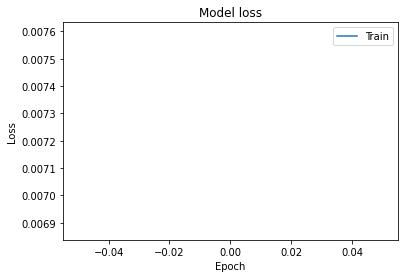

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

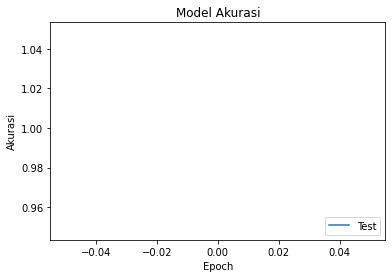

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('Model Akurasi')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Test'], loc='lower right')
plt.show()